This notebook plots some basic statistics about the growth rate of COVID-19 literature

In [3]:
import time
import tqdm
import numpy
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from indra.literature import pubmed_client

def reldate_to_date(reldate):
    return datetime.today() - timedelta(days=reldate)

In [4]:
search_term = 'COVID-19'
reldates = list(range(450, -1, -5))
dates = [reldate_to_date(rd) for rd in reldates]
data = []
for reldate in tqdm.tqdm(reldates):
    ids = pubmed_client.get_ids(search_term, reldate=reldate, retmax=200000)
    data.append(len(ids))
    time.sleep(0.5)

100%|██████████| 91/91 [01:39<00:00,  1.09s/it]


In [6]:
cum_sum = list(data[0] - numpy.array(data[:-1])) + [data[0]]

In [10]:
date_strs = [date.strftime('%m/%d/%Y') for date in dates]

INFO: [2021-03-09 17:26:32] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:32] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:32] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:32] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:32] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:32] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:32] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: 

INFO: [2021-03-09 17:26:33] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:33] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:33] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:33] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:33] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:33] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:33] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: 

INFO: [2021-03-09 17:26:34] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:34] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:34] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.
INFO: [2021-03-09 17:26:34] matplotlib.texmanager - No LaTeX-compatible font found for the sans-serif font family in rcParams. Using default.


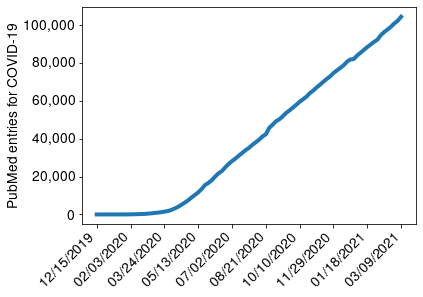

In [28]:
fig = plt.figure()
plt.xticks(ticks=range(0, len(date_strs), 10), labels=date_strs[::10], rotation=45,
           fontsize=14, ha='right')
plt.yticks(fontsize=14)
plt.ylabel('PubMed entries for COVID-19', fontsize=14)
plt.plot(cum_sum, linewidth=4)
fig.gca().get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

Taking out the initial ramp up, plot how many papers were published per day

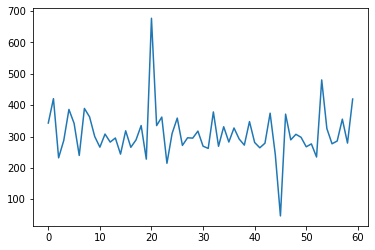

In [76]:
plt.plot(numpy.diff(cum_sum[30:]) / 5)

In [77]:
print('Average number of papers published per day: %d' % numpy.mean(numpy.diff(cum_sum[30:]) / 5))

Average number of papers published per day: 309


In [78]:
print('Total number of papers published so far: %d' % data[0])

Total number of papers published so far: 104436


In [35]:
with open('pubmed_covid19.csv', 'w') as fh:
    for d, n in zip(date_strs, cum_sum):
        fh.write('%s,%s\n' % (d, n))